<a href="https://colab.research.google.com/github/jiayuanteng/Hands_on_ML2/blob/main/7_Ensemble_Learning_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble learning
A group of predictors is called an ensemble; and an Ensemble Learning algorithm is called an Ensemble method

1. Ensemble method works best when the predictors are as independent from one another as possible,
2. Another method is to use bagging/pasting to train the same classifer on random samples of the training data and ensemble the classifers to predict for a new instance by aggregating the predictions of all the classifiers. 


## Voting classifiers
1. The majority-vote classifier is called a *hard voting* classifier.
2. If each classifier is able to estimate class probabilities (i.e., they all have a predict_proba() method), use sklearn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called *soft voting* 

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
# hard voting

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)



VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

Accuracy score is the fraction of samples predicted correctly: $(TP+TN)/(TP+TN_FP+FN)$

In [7]:
from sklearn.metrics import accuracy_score

print("Invidual classifers compared to hard voting classifier")
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  

  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Invidual classifers compared to hard voting classifier
LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


In [8]:
# soft voting
# hard voting

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'soft'
)


print("Invidual classifers compared to soft voting classifier")
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  

  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


Invidual classifers compared to soft voting classifier
LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


## Bagging and pasting
Another method is to use the same training algorithm for every predictor and train them on different random subsets of the training set. Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. 

1. ***Bagging***: when sampling is performed *with* replacement
2. ***Pasting***: when sampling is performed *without* replacement

Set bootstrap in BaggingClassifier to be false to use Pasting. 

n_estimator sets # of the classifiers to train. max_samples set # of instances uses to train each classifier. set n_jobs = -1 to use all of the CPU cores. 

The BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities. 

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, 
    max_samples = 100, bootstrap=True, n_jobs = -1
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [12]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes = [0, 7.5, 0, 3], iris = True, legend = False, 
                           plot_training = True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap)
  if not iris:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap2)
  if plot_training:
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label = "Iris setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label = "Iris versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label = "Iris virginica")
    plt.axis(axes)
  if iris:
    plt.xlabel("Petal length", fontsize = 14)
    plt.xlabel("Petal width", fontsize = 14)
  else:
    plt.xlabel(r"$x_1$", fontsize = 18)
    plt.xlabel(r"$x_2$", fontsize = 18, rotation = 0)
  if legend:
    plt.legend(loc = "lower right", fontsize = 14)


Text(0.5, 1.0, 'Decision Tree with Bagging')

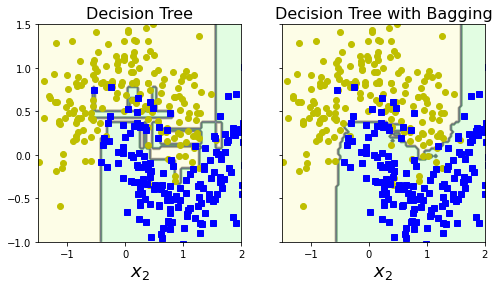

In [18]:

base_clf = DecisionTreeClassifier()
base_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols = 2, figsize = (8, 4), sharey=True)


plt.sca(axes[0])
plot_decision_boundary(base_clf, X_train, y_train, axes = [-1.5, 2, -1, 1.5],
                       iris = False)
plt.title("Decision Tree", fontsize = 16)

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train, axes = [-1.5, 2, -1, 1.5],
                       iris = False)

plt.title("Decision Tree with Bagging", fontsize = 16)

Only about 63% of the training instances are sampled on average for each predictor. The remaining 37% of the training instances that are not sampled are called *out-of-bag* (oob) instances.

Set oob_true = True when creating a BaggingClassifier to request an automatic oob evaluating after training.

In [24]:
bag_clf = BaggingClassifier(
    base_clf, n_estimators = 500,
    bootstrap = True, n_jobs = -1, oob_score = True, random_state = 42

)
bag_clf.fit(X_train, y_train)
print("oob accuracy is {:.2%}".format(bag_clf.oob_score_))

y_pred = bag_clf.predict(X_test)
print("test accuracy is {:.2%}".format(accuracy_score(y_test, y_pred)))


oob accuracy is 89.60%
test accuracy is 92.00%


In [25]:
bag_clf.oob_decision_function_

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06145251, 0.93854749],
       [0.35465116, 0.64534884],
       [0.01142857, 0.98857143],
       [0.98930481, 0.01069519],
       [0.97927461, 0.02072539],
       [0.75586854, 0.24413146],
       [0.0049505 , 0.9950495 ],
       [0.75520833, 0.24479167],
       [0.82122905, 0.17877095],
       [0.98461538, 0.01538462],
       [0.06315789, 0.93684211],
       [0.00490196, 0.99509804],
       [0.99004975, 0.00995025],
       [0.92513369, 0.07486631],
       [1.        , 0.        ],
       [0.03409091, 0.96590909],
       [0.35087719, 0.64912281],
       [0.91111111, 0.08888889],
       [1.        , 0.        ],
       [0.96319018, 0.03680982],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.6635514 , 0.3364486 ],
       [0.